Takes in .AWD, sleep log if it exists, calendar, and spits out some pretty pictures

In [2]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, '/data/MoodGroup/actigraphy/gavi/actigraPy') 

import actigraPy.actigraPy as act
import importlib
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta

/data/MoodGroup/actigraphy/gavi/actigraPy/actigraPy/actigraPy.py:23: MatplotlibDeprecationWarning: 
The matplotlib.backends.tkagg module was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  import matplotlib.backends.tkagg as tkagg


If you want to run the test data, run this cell instead of the one below

In [3]:
# data and log directories
sub = '101' #subject NUMBER as STRING
sub_long = 'sub-MOA%s'%sub

data_dir = '/data/MoodGroup/actigraphy/KMOA/raw/%s'%sub_long #output directory
out_dir = '/data/MoodGroup/actigraphy/KMOA/derivatives/preproc/%s'%sub_long

if not os.path.exists(out_dir):
    os.mkdir(out_dir)


## Subject and directory info

In [4]:
fn = {}
#.AWD
awd_fn = os.path.join(data_dir, '%s.AWD'%sub_long)
#sleeplog
fn['cal']= os.path.join(data_dir, '%s_calendar_log.xls'%sub_long)
#calendar
fn['log'] = os.path.join(data_dir, '%s_sleeplog.xls'%sub_long)
logs = []

if os.path.isfile(awd_fn):
    for name in fn.keys():
        if os.path.isfile(fn[name]):
            print("%s has %s file at %s"%(sub,name,fn[name]))
            logs.append(fn[name])
        else:
            print("no " + name)
            fn[name] = ''
else:
    print("DO NOT CONTINUE!! THERE IS NO AWD FILE")

101 has cal file at /data/MoodGroup/actigraphy/KMOA/raw/sub-MOA101/sub-MOA101_calendar_log.xls
no log


### Make Mtimes file

Figure out where to clip awd file

In [5]:
awd_dat = act.read_AWD(awd_fn)


## Now just run these cells in order to extract comments and write Mtimes

In [28]:
importlib.reload(act)
#Make master mk_idx
mk_idx=act.get_markers(awd_dat)

In [45]:
importlib.reload(act)
#Read logs
for name in fn.keys():
    if os.path.isfile(fn[name]):
        log_dat,kw_dat= act.read_log(fn[name],awd_dat)
        mk_idx[name]=log_dat['idx']
        


      OffDate   OffTime     OnDate    OnTime                         Comment
0         NaT       NaN 2011-10-25  11:00:00                           start
1  2011-10-25  13:00:00 2011-10-25  15:00:00                              3T
2  2011-10-25  21:30:00 2011-10-26  07:00:00                     Sleep study
3  2011-10-26  14:00:00 2011-10-26  16:00:00                             MEG
4  2011-10-26  21:30:00 2011-10-27  07:00:00                     Sleep study
5  2011-10-27  09:00:00 2011-10-27  09:40:00                        Infusion
6  2011-10-27  15:00:00 2011-10-27  17:00:00                             MEG
7  2011-10-27  21:30:00 2011-10-28  07:00:00                     Sleep study
8  2011-10-28  11:00:00 2011-10-28  13:00:00                   7T (canceled)
9  2011-10-29  12:00:00 2011-10-29  14:00:00                              3T
10 2011-11-07  11:00:00 2011-11-07  13:00:00                   7T (canceled)
11 2011-11-08  13:00:00 2011-11-08  15:00:00                              3T

Make passes their own marker

In [59]:
mk_idx['cal']

[(106, 226, '3T'),
 (616, 1186, 'Sleep study'),
 (1606, 1726, 'MEG'),
 (1822, 1926, 'On pass'),
 (2056, 2626, 'Sleep study'),
 (2746, 2786, 'Infusion'),
 (3106, 3226, 'MEG'),
 (3496, 4066, 'Sleep study'),
 (4253, 5595, 'On pass'),
 (4306, 4426, '7T (canceled)'),
 (5776, 6974, 'On pass'),
 (5806, 5926, '3T'),
 (7207, 8437, 'On pass'),
 (8603, 18526, 'On pass'),
 (18689, 20071, 'On pass (maybe ended 7:32 PM?)'),
 (18706, 18826, '7T (canceled)'),
 (20266, 20386, '3T'),
 (20776, 21346, 'Sleep study'),
 (21766, 21886, 'MEG'),
 (22216, 22786, 'Sleep study'),
 (22906, 22946, 'Infusion'),
 (23266, 23386, 'MEG'),
 (23420, 23570, 'On pass'),
 (23656, 24226, 'Sleep study'),
 (24334, 25689, 'On pass'),
 (24466, 24586, '7T (canceled)'),
 (26144, 27234, 'On pass'),
 (26146, 26266, '3T'),
 (27364, 28604, 'On pass'),
 (28754, 38840, 'On pass'),
 (38842, 39499, 'On pass'),
 (38866, 38986, '7T (canceled)'),
 (40426, 40546, '3T'),
 (40546, 40666, 'MEG'),
 (40643, 41462, 'On pass')]

In [64]:
rm_idx=[]
for idx,block in enumerate(mk_idx['cal']):
    comment = block[2]
    if 'pass' in comment:
        rm_idx.append(idx)
rm_idx.sort(reverse=True)
mk_idx['pass']=[]
for idx in rm_idx:
    block = mk_idx['cal'].pop(idx)
    mk_idx['pass'].append(block)
mk_idx['pass']

[(40643, 41462, 'On pass'),
 (38842, 39499, 'On pass'),
 (28754, 38840, 'On pass'),
 (27364, 28604, 'On pass'),
 (26144, 27234, 'On pass'),
 (24334, 25689, 'On pass'),
 (23420, 23570, 'On pass'),
 (18689, 20071, 'On pass (maybe ended 7:32 PM?)'),
 (8603, 18526, 'On pass'),
 (7207, 8437, 'On pass'),
 (5776, 6974, 'On pass'),
 (4253, 5595, 'On pass'),
 (1822, 1926, 'On pass')]

In [65]:
mk_idx['cal']

[(106, 226, '3T'),
 (616, 1186, 'Sleep study'),
 (1606, 1726, 'MEG'),
 (2056, 2626, 'Sleep study'),
 (2746, 2786, 'Infusion'),
 (3106, 3226, 'MEG'),
 (3496, 4066, 'Sleep study'),
 (4306, 4426, '7T (canceled)'),
 (5806, 5926, '3T'),
 (18706, 18826, '7T (canceled)'),
 (20266, 20386, '3T'),
 (20776, 21346, 'Sleep study'),
 (21766, 21886, 'MEG'),
 (22216, 22786, 'Sleep study'),
 (22906, 22946, 'Infusion'),
 (23266, 23386, 'MEG'),
 (23656, 24226, 'Sleep study'),
 (24466, 24586, '7T (canceled)'),
 (26146, 26266, '3T'),
 (38866, 38986, '7T (canceled)'),
 (40426, 40546, '3T'),
 (40546, 40666, 'MEG')]

Write Mtimes

In [66]:
importlib.reload(act)
act.write_Mtimes(awd_dat,mk_idx,os.path.join(out_dir,sub_long))

,OnDate,OnTime,OffDate,OffTime,marker,Comment
0,25-Oct-11,11:39 AM,25-Oct-11,11:53 AM,z,
1,25-Oct-11,12:19 PM,25-Oct-11,12:41 PM,z,
2,25-Oct-11,12:55 PM,25-Oct-11,03:03 PM,z,
3,25-Oct-11,01:00 PM,25-Oct-11,03:00 PM,cal,3T
4,25-Oct-11,06:15 PM,25-Oct-11,06:35 PM,z,
5,25-Oct-11,06:41 PM,25-Oct-11,06:55 PM,z,
6,25-Oct-11,09:09 PM,25-Oct-11,09:23 PM,z,
7,25-Oct-11,09:30 PM,26-Oct-11,07:00 AM,cal,Sleep study
8,25-Oct-11,09:41 PM,25-Oct-11,09:55 PM,z,
9,25-Oct-11,10:11 PM,25-Oct-11,10:37 PM,z,


## Clip AWD for graphs

In [67]:
#read AWD file
awd_dat = act.read_AWD(awd_fn)
idx={'start':[0],'end':[len(awd_dat['dt_list'])-1]}
#get the start and stops from each log if they exist
for log in logs:
    print(log)
    _, kw_dat = act.read_log(log,awd_dat)
    
    if 'watch_on' in kw_dat.keys():
        on_date = kw_dat['watch_on'].iloc[0]['OnDate']
        on_time = kw_dat['watch_on'].iloc[0]['OnTime']
        on = datetime(on_date.year,on_date.month,on_date.day,on_time.hour,on_time.minute)
        #check if that time is in dt_list:
        if awd_dat['dt_list'].count(on) > 0:
            on_idx=awd_dat['dt_list'].index(on)
            idx['start'].append(on_idx)

    if 'watch_off' in kw_dat.keys():
        off_date = kw_dat['watch_off'].iloc[0]['OffDate']
        off_time = kw_dat['watch_off'].iloc[0]['OffTime']
        off = datetime(off_date.year,off_date.month,off_date.day,off_time.hour,off_time.minute)
        if awd_dat['dt_list'].count(off) > 0:
            off_idx=awd_dat['dt_list'].index(off)
            idx['end'].append(off_idx)
 
idx

/data/MoodGroup/actigraphy/KMOA/raw/sub-MOA101/sub-MOA101_calendar_log.xls
      OffDate   OffTime     OnDate    OnTime                         Comment
0         NaT       NaN 2011-10-25  11:00:00                           start
1  2011-10-25  13:00:00 2011-10-25  15:00:00                              3T
2  2011-10-25  21:30:00 2011-10-26  07:00:00                     Sleep study
3  2011-10-26  14:00:00 2011-10-26  16:00:00                             MEG
4  2011-10-26  21:30:00 2011-10-27  07:00:00                     Sleep study
5  2011-10-27  09:00:00 2011-10-27  09:40:00                        Infusion
6  2011-10-27  15:00:00 2011-10-27  17:00:00                             MEG
7  2011-10-27  21:30:00 2011-10-28  07:00:00                     Sleep study
8  2011-10-28  11:00:00 2011-10-28  13:00:00                   7T (canceled)
9  2011-10-29  12:00:00 2011-10-29  14:00:00                              3T
10 2011-11-07  11:00:00 2011-11-07  13:00:00                   7T (canceled)
1

{'start': [0], 'end': [65406, 41776]}

In [68]:
start = max(idx['start'])
end = min(idx['end'])
print('start = %d, end = %d'%(start,end))

start = 0, end = 41776


## <font color='red'>Make sure the starts and ends make sense before clipping the data</font>


In [69]:
#put own number in start + end if disagree with above!
lim = [awd_dat['DateTime'][start],awd_dat['DateTime'][end]]
clip_dat = act.clip_dat(lim,awd_dat)

In [70]:
log_dat,kw_dat = act.read_log(os.path.join(out_dir,sub_long+'_Mtimes.csv'),clip_dat)

        OnDate    OnTime    OffDate   OffTime marker      Comment
0    25-Oct-11  11:39 AM  25-Oct-11  11:53 AM      z             
1    25-Oct-11  12:19 PM  25-Oct-11  12:41 PM      z             
2    25-Oct-11  12:55 PM  25-Oct-11  03:03 PM      z             
3    25-Oct-11  01:00 PM  25-Oct-11  03:00 PM    cal           3T
4    25-Oct-11  06:15 PM  25-Oct-11  06:35 PM      z             
5    25-Oct-11  06:41 PM  25-Oct-11  06:55 PM      z             
6    25-Oct-11  09:09 PM  25-Oct-11  09:23 PM      z             
7    25-Oct-11  09:30 PM  26-Oct-11  07:00 AM    cal  Sleep study
8    25-Oct-11  09:41 PM  25-Oct-11  09:55 PM      z             
9    25-Oct-11  10:11 PM  25-Oct-11  10:37 PM      z             
10   25-Oct-11  10:45 PM  25-Oct-11  11:21 PM      z             
11   25-Oct-11  11:39 PM  26-Oct-11  04:21 AM      z             
12   26-Oct-11  04:25 AM  26-Oct-11  06:23 AM      z             
13   26-Oct-11  06:39 AM  26-Oct-11  07:01 AM      z             
14   26-Oc

In [71]:
mk_idx=log_dat['mks']

## Make graphs

In [72]:
plots = {}
for name in fn.keys():
    if name in mk_idx.keys():
        plots[name]=mk_idx[name]
plots['pass']=mk_idx['pass']

In [73]:
plots

{'cal': [(106, 226, '3T'),
  (616, 1186, 'Sleep study'),
  (1606, 1726, 'MEG'),
  (2056, 2626, 'Sleep study'),
  (2746, 2786, 'Infusion'),
  (3106, 3226, 'MEG'),
  (3496, 4066, 'Sleep study'),
  (4306, 4426, '7T (canceled)'),
  (5806, 5926, '3T'),
  (18706, 18826, '7T (canceled)'),
  (20266, 20386, '3T'),
  (20776, 21346, 'Sleep study'),
  (21766, 21886, 'MEG'),
  (22216, 22786, 'Sleep study'),
  (22906, 22946, 'Infusion'),
  (23266, 23386, 'MEG'),
  (23656, 24226, 'Sleep study'),
  (24466, 24586, '7T (canceled)'),
  (26146, 26266, '3T'),
  (38866, 38986, '7T (canceled)'),
  (40426, 40546, '3T'),
  (40546, 40666, 'MEG')],
 'pass': [(1822, 1926, 'On pass'),
  (4253, 5595, 'On pass'),
  (5776, 6974, 'On pass'),
  (7207, 8437, 'On pass'),
  (8603, 18526, 'On pass'),
  (18689, 20071, 'On pass (maybe ended 7:32 PM?)'),
  (23420, 23570, 'On pass'),
  (24334, 25689, 'On pass'),
  (26144, 27234, 'On pass'),
  (27364, 28604, 'On pass'),
  (28754, 38840, 'On pass'),
  (38842, 39499, 'On pass'),


46
25-Oct-11
0 765
plotting: 780,900 from cal
plotting: 1290,1439 from cal
26-Oct-11
766 2205
plotting: 0,420 from cal
plotting: 840,960 from cal
plotting: 1290,1439 from cal
plotting: 1056,1160 from pass
27-Oct-11
2206 3645
plotting: 0,420 from cal
plotting: 540,580 from cal
plotting: 900,1020 from cal
plotting: 1290,1439 from cal
28-Oct-11
3646 5085
plotting: 0,420 from cal
plotting: 660,780 from cal
plotting: 607,1439 from pass
29-Oct-11
5086 6525
plotting: 720,840 from cal
plotting: 0,509 from pass
plotting: 690,1439 from pass
30-Oct-11
6526 7965
plotting: 0,448 from pass
plotting: 681,1439 from pass
31-Oct-11
7966 9405
plotting: 0,471 from pass
plotting: 637,1439 from pass
01-Nov-11
9406 10845
plotting: 0,1439 from pass
02-Nov-11
10846 12285
plotting: 0,1439 from pass
03-Nov-11
12286 13725
plotting: 0,1439 from pass
04-Nov-11
13726 15165
plotting: 0,1439 from pass
05-Nov-11
15166 16605
plotting: 0,1439 from pass
06-Nov-11
16606 18045
plotting: 0,1439 from pass
07-Nov-11
18046 1948

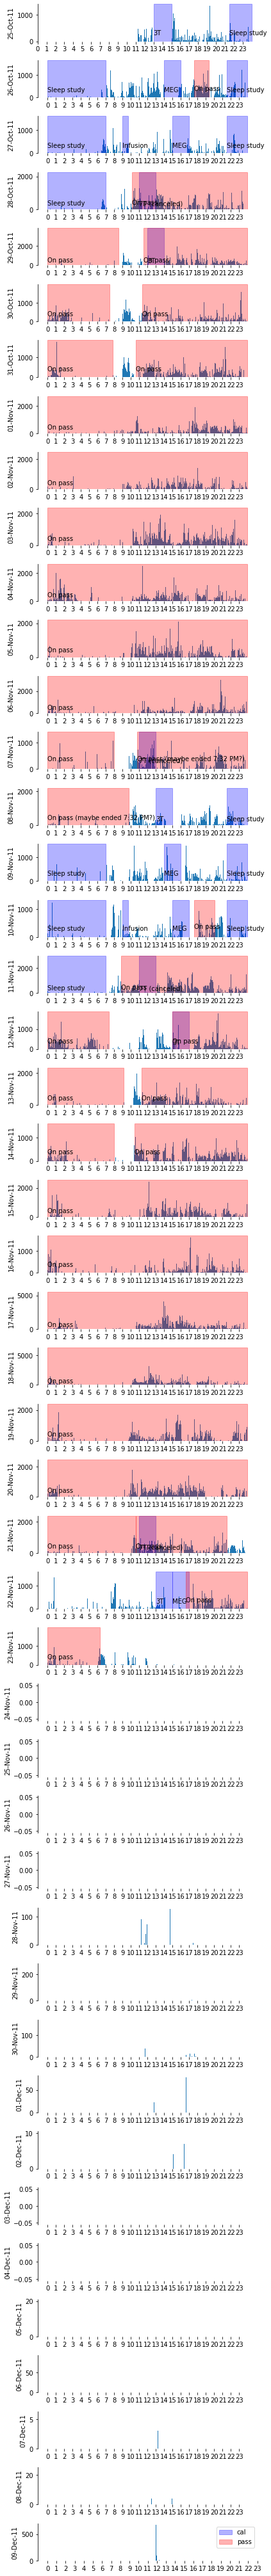

In [74]:
importlib.reload(act)

act.plot_awd(clip_dat,plots,show=False,fn_pref=os.path.join(out_dir,sub_long+'_M+logs'),plot_type='single',debug=True)


In [ ]:
max(awd_dat['activity'])

46
25-Oct-11
0 765
plotting: 780,900 from cal
plotting: 1290,1439 from cal
26-Oct-11
766 2205
plotting: 0,420 from cal
plotting: 840,960 from cal
plotting: 1290,1439 from cal
plotting: 1056,1160 from pass
27-Oct-11
2206 3645
plotting: 0,420 from cal
plotting: 540,580 from cal
plotting: 900,1020 from cal
plotting: 1290,1439 from cal
28-Oct-11
3646 5085
plotting: 0,420 from cal
plotting: 660,780 from cal
plotting: 607,1439 from pass
29-Oct-11
5086 6525
plotting: 720,840 from cal
plotting: 0,509 from pass
plotting: 690,1439 from pass
30-Oct-11
6526 7965
plotting: 0,448 from pass
plotting: 681,1439 from pass
31-Oct-11
7966 9405
plotting: 0,471 from pass
plotting: 637,1439 from pass
01-Nov-11
9406 10845
plotting: 0,1439 from pass
02-Nov-11
10846 12285
plotting: 0,1439 from pass
03-Nov-11
12286 13725
plotting: 0,1439 from pass
04-Nov-11
13726 15165
plotting: 0,1439 from pass
05-Nov-11
15166 16605
plotting: 0,1439 from pass
06-Nov-11
16606 18045
plotting: 0,1439 from pass
07-Nov-11
18046 1948

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x2b20c4b036a8> (for post_execute):


KeyboardInterrupt: 

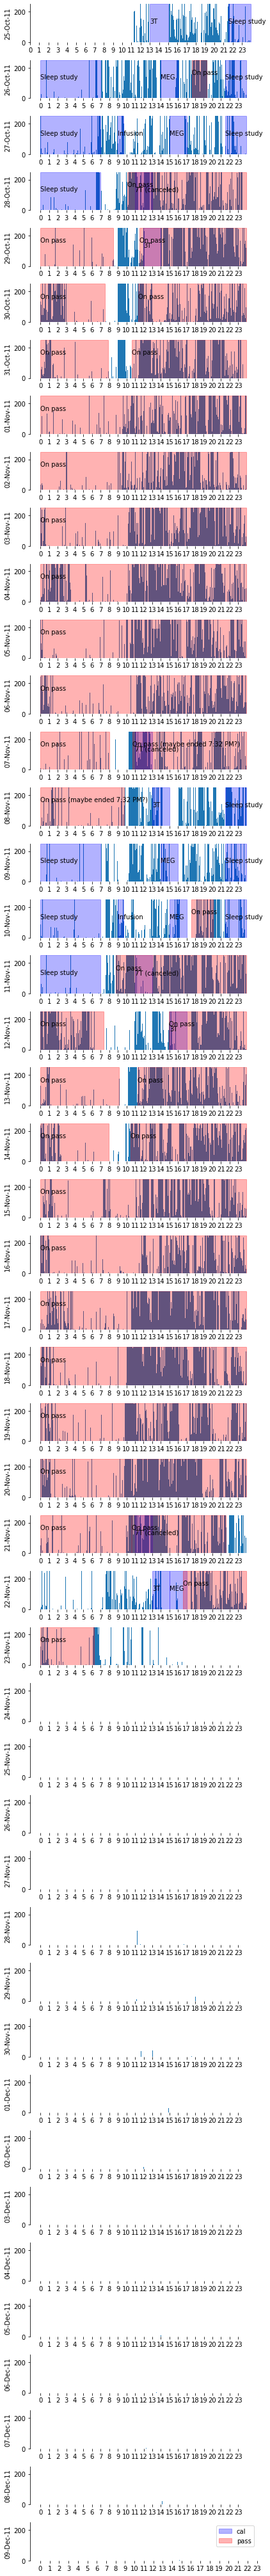

In [75]:
importlib.reload(act)

act.plot_awd(clip_dat,plots,max_act=250,show=False,fn_pref=os.path.join(out_dir,sub_long+'_M+logs_zoom'),plot_type='single',debug=True)
